# Machine Learning Coursework 2

For coursework 2 you will be asked to train and evalute several different classifiers: Naïve Bayes classifier, Random Forest classifier, and kNN classifier using the iris dataset. You will be asked to answer a series of questions relating to each individual model and questions comparing each model. 

#### You are free to use the sklearn library. 


Notes:
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Code                                               | 7     |
| Code Report/comments                               | 6     |
| Model questions                                    | 14    |  
| Model comparision questions                        | 18    |
| Total available                                    |**45** |  

##### Remember to save your notebook as “CW2.ipynb”. It is a good idea to re-run the whole thing before saving and submitting. 










## Web References

- [The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
- [sklearn.datasets.load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
- [Iris Species:100% Accuracy using Naive bayes](https://www.kaggle.com/vinayshaw/iris-species-100-accuracy-using-naive-bayes)
- [Naive Bayes Classifier with Scikit](https://python-course.eu/machine-learning/naive-bayes-classifier-with-scikit.php)
- [scikit-learn Classifiers on Iris Dataset](https://www.kaggle.com/chungyehwang/scikit-learn-classifiers-on-iris-dataset)
- [Random Forest Feature Importance Computed in 3 Ways with Python](https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=Random%20Forest%20Built-in%20Feature%20Importance&text=It%20is%20a%20set%20of,sets%20with%20similars%20responses%20within.)
- [Accuracy, Precision, Recall & F1-Score – Python Examples](https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/)

## Import Libraries

In [58]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# set the randon seed to use for reproducibility
random_state = 1337

# the fraction of the data to use for testing
test_frac = 0.5

## 1. Classifiers [7 marks total]

In [3]:
# import datasets
from sklearn import datasets 

# load data
iris = datasets.load_iris() # load data 

In [4]:
# get the predictors and target
X = iris.data
y = iris.target

In [5]:
# split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_frac, 
    stratify=y,
    random_state=random_state)

print('There are %d samples in the training set and %d samples in the test set' % (X_train.shape[0], X_test.shape[0]))

There are 75 samples in the training set and 75 samples in the test set


### a) Baseline

The Pycaret library is use in this section to establish a baseline for model performance.

> ℹ️ This section is not core the answering the coursework questions.

In [6]:
# import the pycaret dependencies
from pycaret.classification import *

In [7]:
# convert the training dataset to a dataframe
df_train = pd.DataFrame(data=X_train, columns=iris.feature_names)
df_train['target'] = pd.Series(y_train)

# convert the test data to a dataframe
df_test = pd.DataFrame(data=X_test, columns=iris.feature_names)
df_test['target'] = pd.Series(y_test)

In [8]:
# initialize the training environment and transformation pipeline
classifier = setup(
    data=df_train, 
    target='target',
    session_id=random_state,
    silent=True,
    verbose=False)

In [9]:
# train a naive bayes, random forest, and knn classification model
models = compare_models(include=['nb', 'rf', 'knn'], n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9467,0.9917,0.9500,0.9678,0.9444,0.9206,0.9317,0.5110
rf,Random Forest Classifier,0.9433,1.0000,0.9500,0.9356,0.9322,0.9194,0.9361,2.5330
knn,K Neighbors Classifier,0.9267,1.0000,0.9333,0.9544,0.9231,0.8893,0.9052,0.0330


The following section optimizes each model by using a [random grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) from the scikit-learn library.

In [10]:
# find the best hyperparameters for each model
tuned_models = [tune_model(model,search_library='scikit-learn', search_algorithm='random') for model in models]

# display the model parameters
for model in models:
    print(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,1.0000,0.8333,0.8889,0.8222,0.7500,0.7833
1,0.8333,1.0000,0.8333,0.8889,0.8222,0.7500,0.7833
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8000,1.0000,0.8333,0.8667,0.7867,0.6875,0.7350
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


GaussianNB(priors=None, var_smoothing=1e-09)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1337, verbose=0,
                       warm_start=False)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


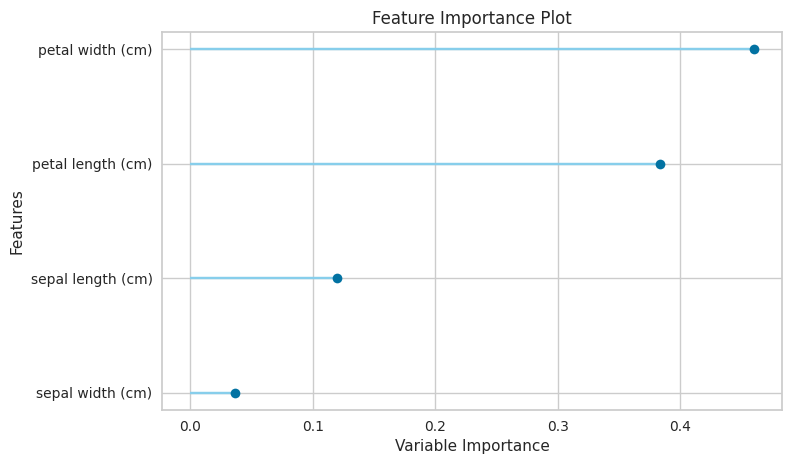

In [11]:
# show the feature importance of the random forest model
for model in models:
    if type(model).__name__ == 'RandomForestClassifier':
        plot_model(model, plot='feature')

In [12]:
# evaluate each model on the test data
for model in tuned_models:
    print('--- %s ---' % type(model))

    df_predicted = predict_model(estimator=model, data=df_test)
    print(classification_report(y_true=df_predicted.target, y_pred=df_predicted.Label, target_names=iris.target_names))

--- <class 'sklearn.naive_bayes.GaussianNB'> ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.89      1.00      0.94        25
   virginica       1.00      0.88      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

--- <class 'sklearn.ensemble._forest.RandomForestClassifier'> ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.86      1.00      0.93        25
   virginica       1.00      0.84      0.91        25

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

--- <class 'sklearn.neighbors._classification.KNeighborsClassifier'> ---
              precision    recall  f1-score   supp

### b) Modeling Functions

This section contains re-usable functions to reduce the amount of repeated code.

In [13]:
class Modeler:
    """
    Modeler class to train and evaluate models.
    """
    def __init__(self, model, X_train, y_train, X_test, y_test, feature_names, target_names):
        """
        Initialize the modeler.

        Parameters
        ----------
        model : sklearn model
            The model to train and evaluate.
        X_train : numpy array
            The training data.
        y_train : numpy array
            The training labels.
        X_test : numpy array
            The test data.
        y_test : numpy array
            The test labels.
        feature_names : list
            The feature names.
        target_names : list
            The target names.
        """
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_names = feature_names
        self.target_names = target_names

    def train(self):
        """
        Train the model
        """
        self.model.fit(self.X_train, self.y_train)

    def evaluate(self):
        """
        Evaluate the model
        """
        y_predicted = self.model.predict(self.X_test)
        print(classification_report(y_true=self.y_test, y_pred=y_predicted, target_names=self.target_names))

    def get_feature_importance(self) -> pd.DataFrame:
        """
        Get the feature importance of the model.

        Returns
        -------
        pd.DataFrame
            The feature importance of the model.
        """
        if type(self.model).__name__ == 'RandomForestClassifier':
            return pd.DataFrame({
                'feature': self.feature_names,
                'importance': self.model.feature_importances_
            })
        else:
            print('Model does not support feature importance.')

    def get_evaluation(self) -> pd.DataFrame:
        """
        Get the evaluation of the model on the test dataset.

        Returns
        -------
        pd.DataFrame
            The evaluation of the model on the test dataset.
        """
        y_predicted = self.model.predict(self.X_test)
        return pd.DataFrame([{
            'model': type(self.model).__name__,
            'precision': precision_score(y_true=self.y_test, y_pred=y_predicted, average='weighted'),
            'recall': recall_score(y_true=self.y_test, y_pred=y_predicted, average='weighted'),
            'f1-score': f1_score(y_true=self.y_test, y_pred=y_predicted, average='weighted'),
            'accuracy': accuracy_score(y_true=self.y_test, y_pred=y_predicted)
        }])

    def get_accuracy(self) -> float:
        """
        Get the accuracy of the trained model on the test dataset.

        Returns
        -------
        float
            The accuracy of the model.
        """
        return accuracy_score(y_true=self.y_test, y_pred=self.model.predict(self.X_test))

### 1.1 Naïve Bayes Classifier [2]

#### 1.1.1 Train the Naive Bayes Classifier

In [14]:
# create a new modeler
modeler_nb = Modeler(
    model=GaussianNB(), 
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test, 
    y_test=y_test,
    feature_names=iris.feature_names,
    target_names=iris.target_names)

# train the model
modeler_nb.train()

In [15]:
# evaluation the model on the test set
modeler_nb.evaluate()

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.89      1.00      0.94        25
   virginica       1.00      0.88      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



### 1.2 Random Forst Classifier [3]


#### 1.2.1 Train a random forest classifier 

In [16]:
# create a new modeler
modeler_rf = Modeler(
    model=RandomForestClassifier(
        n_jobs=-1,
        random_state=random_state
    ), 
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test, 
    y_test=y_test,
    feature_names=iris.feature_names,
    target_names=iris.target_names)

# train the model
modeler_rf.train()

In [17]:
# evaluation the model on the test set
modeler_rf.evaluate()

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.89      1.00      0.94        25
   virginica       1.00      0.88      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



#### 1.2.2 Evaluate feature performance

The table below shows that the `sepal length (cm)` and `sepal width (cm)` features have very low importance in the model. Therefore, we can assume that removing these features will have a minimal impact on the model

In [18]:
# show the importance of each feature
df_feature_importance = modeler_rf.get_feature_importance().sort_values(by='importance', ascending=False)
df_feature_importance

,feature,importance
3,petal width (cm),0.458948
2,petal length (cm),0.403974
0,sepal length (cm),0.094816
1,sepal width (cm),0.042261


Training a new model with the least important features removed creates a model with identical performance.

❗️ However, in datasets as small as the iris dataset, the test/train split and random seed can significantly impact the results, so we cannot conclude that model performance will always be precisely the same.

In [19]:
def create_rf_modeler(X_train, y_train, X_test, y_test, selected_features:list, random_state:int) -> Modeler:
    """
    Create a random forest modeler.

    Parameters
    ----------
    X_train : numpy array
        The training data.
    y_train : numpy array
        The training labels.
    X_test : numpy array
        The test data.
    y_test : numpy array
        The test labels.
    selected_features : list
        The selected features.
    random_state : int
        The random state.

    Returns
    -------
    Modeler
        The trained random forest modeler.
    """
    # create a new modeler
    modeler = Modeler(
        model=RandomForestClassifier(
            n_jobs=-1,
            random_state=random_state
        ), 
        X_train=X_train[:, selected_features], 
        y_train=y_train, 
        X_test=X_test[:, selected_features], 
        y_test=y_test,
        feature_names=None,
        target_names=iris.target_names)

    # train the model
    modeler.train()

    return modeler

In [20]:
# evalute model performance with only feature 2 and 3
selected_features = [2, 3]
modeler_rf_sel = create_rf_modeler(X_train, y_train, X_test, y_test, selected_features, random_state)

# evaluation the model on the test set
modeler_rf_sel.evaluate()

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.89      1.00      0.94        25
   virginica       1.00      0.88      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



#### 1.2.3 Visualise the feature importance

Text(0.5, 1.0, 'Figure 1. Feature Importance')

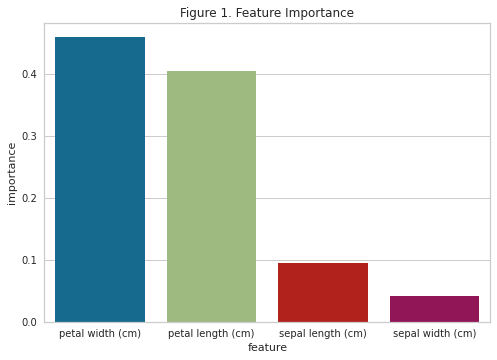

In [21]:
sns.barplot(
    data=df_feature_importance,
    x='feature',
    y='importance').set_title('Figure 1. Feature Importance')

### 1.3 kNN Classifier [2]

In [22]:
# create a new modeler
modeler_knn = Modeler(
    model=KNeighborsClassifier(n_jobs=-1), 
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test, 
    y_test=y_test,
    feature_names=iris.feature_names,
    target_names=iris.target_names)

# train the model
modeler_knn.train()

In [23]:
# evaluation the model on the test set
modeler_knn.evaluate()

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.93      1.00      0.96        25
   virginica       1.00      0.92      0.96        25

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



## 2 Code Report [6 marks total]

The baseline section creates initial models with the  [PyCaret library](https://pycaret.org/) to understand if the approach is correct and the expected model performance baseline.

In section 1. b, a `Modeler` class is implemented to allow consistency and reduce repeated code when evaluating model performance. Creating a new class instance requires a scikit-learn model configured with the appropriate hyperparameters and the training and test data.

The class has the following methods:

-	` train` - Train the model by fitting the training data (`X_train` and `y_train`)
-	`evaluate` - This method use the trained model to predict labels for the test set (`X_test`), compare the output with the actual labels (`y_test`), and print a classification report for evaluation.
-	` get_feature_importance` - If the model is a ` RandomForestClassifier`, this function returns a data frame with the feature importance.
-	` get_evaluation` - This function is similar to `evaluate` but returns a data frame containing only the weighted average for the evaluation metrics.
-	` get_accuracy` - This function returns only the accuracy score for the predictions on the test set.

Each classifier (Naïve Bayes, Random Forest, and k-NN) is trained and evaluated using the `Modeler` class.

In further sections of the notebook, the following helper methods can are found:

-	` create_rf_modeler` - This function creates variations of the Random Forest for use in multiple experiments found in the notebook. One of the key input parameters is ` selected_features `, allowing model training to use only a subset of the features.
-	` backwards_elimination` - This function is specifically for experimentation with the Random Forest algorithm. The first step is to train n initial model with the entire feature set. Then the least important feature is iteratively removed until only a single feature remains. Finally, the results are returned a  data frame showing the feature removed at each set and the performance metrics of the resulting model.
-	` get_random_influence` - This function generates data to illustrate the influence of training the models on different datasets that results from only varying the random seed variable while keeping all other variables consistent.


## 3 Model Questions [14 marks total]

### 3.1 Naïves Bayes Questions [4]

#### 3.1.1 Why do zero probabilities in our Naïve Bayes model cause problems?

If an instance in the dataset has no training tuple (class label and particular attribute value), the frequency-based probability estimate will be zero (Naïve Bayes Algorithm: Everything you need to know, 2020), and the model is unable to make predictions

#### 3.1.2 How can we avoid the problem of zero probabilities in our Naïve Bayes model?

Techniques such as `Laplace` or `Lidstone` smoothing can be used to account for features not present in the training samples to prevent the problem of zero probabilities (1.9. Naive Bayes — scikit-learn 1.0.2 documentation, 2022).

For a simple illustration of how this might work: Add one to the frequency of every attribute value-class combination where the attribute value does not occur with every class value (Vashisht, 2020).

### 3.2 Random Forest Questions [6]

In [26]:
# create pairplot (https://www.kaggle.com/vinayshaw/iris-species-100-accuracy-using-naive-bayes) and (https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)
# and create a feature plot (https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=Random%20Forest%20Built%2Din%20Feature%20Importance&text=It%20is%20a%20set%20of,sets%20with%20similars%20responses%20within.)

#### 3.2.1 Which feature is the most important from your random forest classifier?

Figure 1 (section 1.2.3) shows that `petal width (cm)` is the most important feature.

However, the Iris dataset is so simple that a boxplot (shown below) of each feature already reveals that the `petal width (cm)` and `petal length (cm)` have the least amount of overlap between the classes and accordingly have the most predictive power.

Text(0.5, 1.0, 'Scores by group and gender')

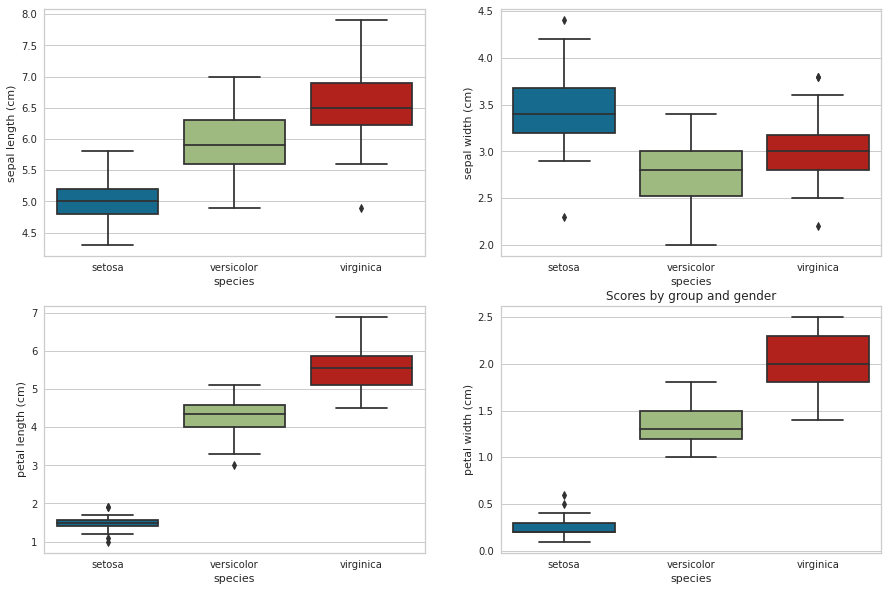

In [68]:
# load the dataset
bunch = datasets.load_iris(as_frame=True)
df_iris = bunch.data

# map the target integers to names
target_names = {}
for i, name in enumerate(bunch.target_names):
    target_names[i] = name

# join the species name to the feature dataframe
df_iris = df_iris.join(pd.Series(bunch.target.map(target_names), name='species'))

plt.figure(figsize=(15,10))
# create the plot
for i, feature in enumerate(bunch.feature_names):
   plt.subplot(2,2,i+1)
   sns.boxplot(data=df_iris, x='species', y=feature)

#### 3.2.2 Can any features be removed to increase accuracy of the model, if so which features?

In [27]:
def backwards_elimination(X_train, y_train, X_test, y_test, random_state, feature_names=None, feature_dictionary=None, elimination_feature=None, results:pd.DataFrame = pd.DataFrame()) -> pd.DataFrame:
    """
    Backwards elimination of features.

    Parameters
    ----------
    X_train : numpy.ndarray
        The training dataset.
    y_train : numpy.ndarray
        The target values of the training dataset.
    X_test : numpy.ndarray
        The test dataset.
    y_test : numpy.ndarray
        The target values of the test dataset.
    random_state : int
        The random state.
    feature_names : list
        The feature names.

    Returns
    -------
    pd.DataFrame
        The results of the backward elimination.
    """
    # create the feature dictionary
    if (feature_dictionary is None):
        feature_dictionary = {}
        for (i, feature_name) in enumerate(feature_names):
            feature_dictionary[i] = feature_name

    # get the selected features for training
    selected_features = list(feature_dictionary.keys())

    # create the trained random forest modeler
    modeler = create_rf_modeler(X_train, y_train, X_test, y_test, selected_features, random_state)

    # get the evaluation of the model on the test set   
    df_evaluation = modeler.get_evaluation().iloc[: , 1:]
    df_evaluation.insert(0, 'eliminated', elimination_feature)
    results = results.append(df_evaluation, ignore_index=True)

    # feature elimination stops when a single feature remains
    if len(feature_dictionary) > 1:
        # get the feature to remove
        df_feature_importance = modeler.get_feature_importance().sort_values(by='importance', ascending=True)
        elimination_feature_index = df_feature_importance.index[0]
        elimination_feature = list(feature_dictionary.keys())[elimination_feature_index]

        # get the name of the eliminated feature
        elimination_feature_name = feature_dictionary[elimination_feature]

        # remove the feature and perform the next iteration
        del feature_dictionary[elimination_feature]
        results = backwards_elimination(X_train, y_train, X_test, y_test, random_state, feature_dictionary=feature_dictionary, elimination_feature=elimination_feature_name, results=results)
        return results
    else:
        return results

backwards_elimination(X_train, y_train, X_test, y_test, random_state, feature_names=iris.feature_names)

,eliminated,precision,recall,f1-score,accuracy
0,None,0.964286,0.960000,0.959855,0.960000
1,sepal width (cm),0.954023,0.946667,0.946323,0.946667
2,sepal length (cm),0.964286,0.960000,0.959855,0.960000
3,petal length (cm),0.954023,0.946667,0.946323,0.946667


#### 3.2.3 Explain why it would be useful to remove these features.

### 3.3 kNN Questions [4]
Do you think the kNN classifier is best suited to the iris dataset? 

What ideal qualities would the most appropriate dataset display?  

Please answer in the cell below.

In [28]:
#Write your answer here

#### 3.3.1 Do you think the kNN classifier is best suited to the iris dataset?

#### 3.3.2 What ideal qualities would the most appropriate dataset display?

## 4 Comparing Models [18 marks total]
Please answer the following questions comparing your classifiers.

In [29]:
# display the model metrics for the test set
pd.concat([
    modeler_nb.get_evaluation(),
    modeler_rf.get_evaluation(),
    modeler_knn.get_evaluation()
])

,model,precision,recall,f1-score,accuracy
0,GaussianNB,0.964286,0.960000,0.959855,0.960000
0,RandomForestClassifier,0.964286,0.960000,0.959855,0.960000
0,KNeighborsClassifier,0.975309,0.973333,0.973291,0.973333


### 4.1 Compare each model [3]
What differences do you see between your Naïve Bayes classifier, your random forest classifier, and your kNN classifier? 

In [30]:
#Write your answer here

### 4.2 Accuracy [6]
Can you explain why there are differences in accuracy between the three classifiers? 

In [31]:
#Write your answer here



| Algorithm     | Bias | Variance |
| ------------- | ---- | -------- |
| Naive Bayes   | High | Low      |
| Random Forest | Low  | High     |
| kNN           | Low  | High     |

https://machinelearningmastery.com/different-results-each-time-in-machine-learning/

- Variance: How sensitive the algorithm is to the specific data used during training.
- A more sensitive algorithm has a larger variance, which will result in more difference in the model, and in turn, the predictions made and evaluation of the model. Conversely, a less sensitive algorithm has a smaller variance and will result in less difference in the resulting model with different training data, and in turn, less difference in the resulting predictions and model evaluation.
 
 https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/

- Low Bias: Suggests less assumptions about the form of the target function.
- High-Bias: Suggests more assumptions about the form of the target function.
- Examples of low-bias machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.
- Examples of high-bias machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

 - Variance Error: Variance is the amount that the estimate of the target function will change if different training data was used.
 - The target function is estimated from the training data by a machine learning algorithm, so we should expect the algorithm to have some variance.
 - The k-nearest neighbors algorithm has low bias and high variance, but the trade-off can be changed by increasing the value of k which increases the number of neighbors that contribute t the prediction and in turn increases the bias of the model.

 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6695655/
 - Naïve Bayes are not sensitive to dataset composition, whereas others e.g., hyperpipes (hip), k-nearest neighbors (lBk) and random forest (RF) are highly sensitive. Therefore, the best (or suitable) classifiers can only be selected if the dataset composition is also considered.

 https://www.analyticsvidhya.com/blog/2020/12/a-measure-of-bias-and-variance-an-experiment/

 - Random Forest - 	Low Bias, High Variance

 https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.579.2693&rep=rep1&type=pdf

 - High bias and low variance algorithms result in models that are more robust to changes in the training data since they are not close representations of that data.
- Naive Bayes is generally regarded as high bias and low variance because the assumptions it makes about the interactions among features have nothing to do with a particular training sample.

In [32]:
def get_random_influence(models:list, random_seeds:list, X, y, target_names, all_data:bool=False, stratify:bool=True) -> pd.DataFrame:
    """
    Experiment with the influence of the random seed on model accuracy.

    Parameters
    ----------
    models : list
        The list of models to evaluate.
    random_seeds : list
        The random seeds.
    X : numpy array
        The training data.
    y : numpy array
        The training labels.
    target_names : list
        The target names.
    all_data : bool, optional
        Whether to use all the data for training and testing.
    stratify : bool, optional
        Whether to stratify the data.

    Returns
    -------
    pd.DataFrame
        A dataframe containing the experiment results.
    """

    df_random_influence = pd.DataFrame(columns=['model', 'seed', 'accuracy'])
    for random_seed in random_seeds:
        if all_data:
            # use the complete dataset for training and testing
            X_train = X
            X_test = X
            y_train = y
            y_test = y
        else:
            # create the data split using the random seed
            X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                test_size=test_frac, 
                stratify=y if stratify else None,
                random_state=random_seed)     

        # evaluate each model
        for model in models:
            if hasattr(model, 'random_state'):
                model.random_state = random_seed

            modeler = Modeler(
                model=model, 
                X_train=X_train, 
                X_test=X_test, 
                y_train=y_train, 
                y_test=y_test,
                feature_names=None,
                target_names=target_names)

            # train the model
            modeler.train()

            # get the model accuracy
            accuracy = modeler.get_accuracy()

            # add the model accuracy to the dataframe
            df_random_influence = df_random_influence.append(
                {
                    'model': model.__class__.__name__,
                    'seed': random_seed,
                    'accuracy': accuracy
                },
                ignore_index=True
            )

    return df_random_influence

In [33]:
# get a list of random seeds to use for the experiment
random.seed(random_state)
random_seeds = [random.randint(0,9000) for i in range(0,100)]

#random_seeds = [random_state, 43, 80085, 3000, 2000, 4000]
#random_seeds = list(range(0, 100))

# get the accuracy of the models using different random seeds
df_accuracy = get_random_influence(
    models=[modeler_nb.model, modeler_rf.model, modeler_knn.model],
    random_seeds=random_seeds,
    X=X,
    y=y,
    target_names=iris.target_names,
    stratify=False)

Text(0.5, 1.0, 'Figure 2. Model Accuracy')

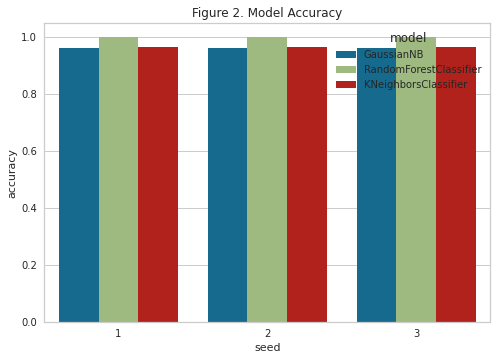

In [66]:
# plot the results
sns.barplot(
    data=df_accuracy.head(10*3),
    x='seed',
    y='accuracy',
    hue='model').set_title('Figure 2. Model Accuracy')

> ❌ Use the table below to look at the accuracy mean (bias) and standard deviation (variance) to help explain the the differences in accuracy. KNN has a low bias and high variance.

In [35]:
df_accuracy.groupby('model').describe().droplevel(axis=1, level=0).reset_index()

,model,count,mean,std,min,25%,50%,75%,max
0,GaussianNB,100.0,0.950667,0.019740,0.906667,0.933333,0.946667,0.960000,0.986667
1,KNeighborsClassifier,100.0,0.957733,0.022587,0.880000,0.946667,0.960000,0.973333,1.000000
2,RandomForestClassifier,100.0,0.945867,0.021509,0.866667,0.933333,0.946667,0.960000,0.986667


Text(0.5, 1.0, 'Figure 3. Model Accuracy - All Data')

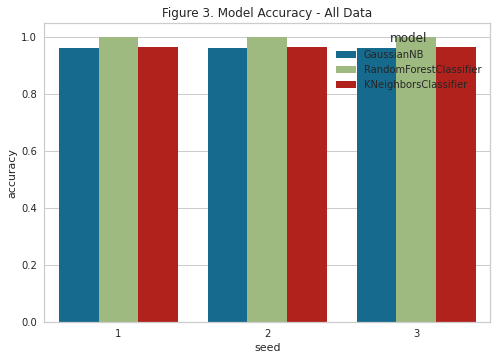

In [36]:
# get the accuracy of the models using different random seeds
df_accuracy = get_random_influence(
    models=[modeler_nb.model, modeler_rf.model, modeler_knn.model],
    random_seeds=list(range(1,4)),
    X=X,
    y=y,
    target_names=iris.target_names,
    all_data=True)

# plot the results
sns.barplot(
    data=df_accuracy,
    x='seed',
    y='accuracy',
    hue='model').set_title('Figure 3. Model Accuracy - All Data')

### 4.3 Appropriate Use [9]
When would it be appropriate to use each different classifier? 

Reference real-world situations and examples of specific data sets and explain why that classifier would be most appropriate for that use-case.

In [37]:
#Write your answer here

https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
- In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering.
- They require a small amount of training data to estimate the necessary parameters.
- Although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
- Naive Bayes models can be used to tackle large scale classification problems for which the full training set might not fit in memory. 

https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
- When the assumption of independence holds, a Naive Bayes classifier performs better compared to other models like logistic regression.
- Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.



https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees
- Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.


KNN 
- https://www.ibm.com/docs/en/ias?topic=knn-usage
- https://towardsdatascience.com/knn-algorithm-what-when-why-how-41405c16c36f

Random Forest
- https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
- https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/#:~:text=Random%20Forest%20is%20suitable%20for,becomes%20more%20difficult%20to%20interpret.

Naive Bayes
- https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
- https://www.ibm.com/docs/en/ias?topic=bayes-background